In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from loaders import load_features, load_categories

np.random.seed(42)

In [2]:
columns_extended = ['category_id', 'description_num_chars', 'description_num_periods',
       'description_sentiment', 'description_num_words',
       'description_num_numbers', 'title_num_uppercase_words',
       'description__show', 'l1', 'description_num_question_marks',
       'tag__science', 'publish_hour', 'tag__educational',
       'description__life', 'tag__celebrity', 's2', 'tag__comedy',
       'description__follow', 'tag__food', 'description__time',
       'description__new', 'tag__beauty', 'tag__tech', 'publish_weekday',
       'like_ratio', 'title_num_question_marks',
       'title_num_exclamation_marks', 'title_num_periods',
       'title_num_numbers', 'title__1', 'title__2018', 'title__2017',
       'description__trailer', 'description__nhttp', 'description__news',
       'description__game', 'description__music', 'description__watch',
       'description__world', 'tag__official', 'tag__trailer',
       'tag__fashion', 'tag__highlights', 'tag__pop', 'tag__sports',
       'tag__technology', 'tag__movie', 'tag__music', 'tag__drama',
       'tag__funny', 'has_image', 'faces_total', 'faces_angry',
       'faces_fear', 'faces_happy', 'faces_surprise']
columns_reduced = ['category_id', 'title_num_uppercase_words', 'description_num_question_marks',
       'description__follow', 'description__show', 'description__life',
       'description__time', 'description__new', 'tag__comedy',
       'tag__science', 'tag__food', 'tag__beauty', 'tag__celebrity',
       'description_num_chars']
# features = load_features().drop(columns=['video_id'])
features = load_features()[columns_reduced]
features

,category_id,title_num_uppercase_words,description_num_question_marks,description__follow,description__show,description__life,description__time,description__new,tag__comedy,tag__science,tag__food,tag__beauty,tag__celebrity,description_num_chars
0,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,823.0
1,NaN,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419.0
2,NaN,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,595.0
3,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,396.0
4,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8602,NaN,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1073.0
8603,NaN,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1079.0
8604,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,839.0
8605,NaN,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,596.0


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

categories = load_categories()
# ctg_count = max(map(int, categories.keys())) + 1
# categories_list = [categories.get(str(key)) for key in range(ctg_count)]

known_categories = ~features['category_id'].isna()
df = features[known_categories]
x = df.drop(columns=['category_id']).fillna(0)
y = df['category_id'].apply(lambda ctg_id: categories[str(int(ctg_id))])

x = scaler.fit_transform(x)

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1, 17, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    print(k, score)

1 0.23232323232323232
3 0.25252525252525254
5 0.24242424242424243
7 0.30303030303030304
9 0.2828282828282828
11 0.2828282828282828
13 0.30303030303030304
15 0.26262626262626265


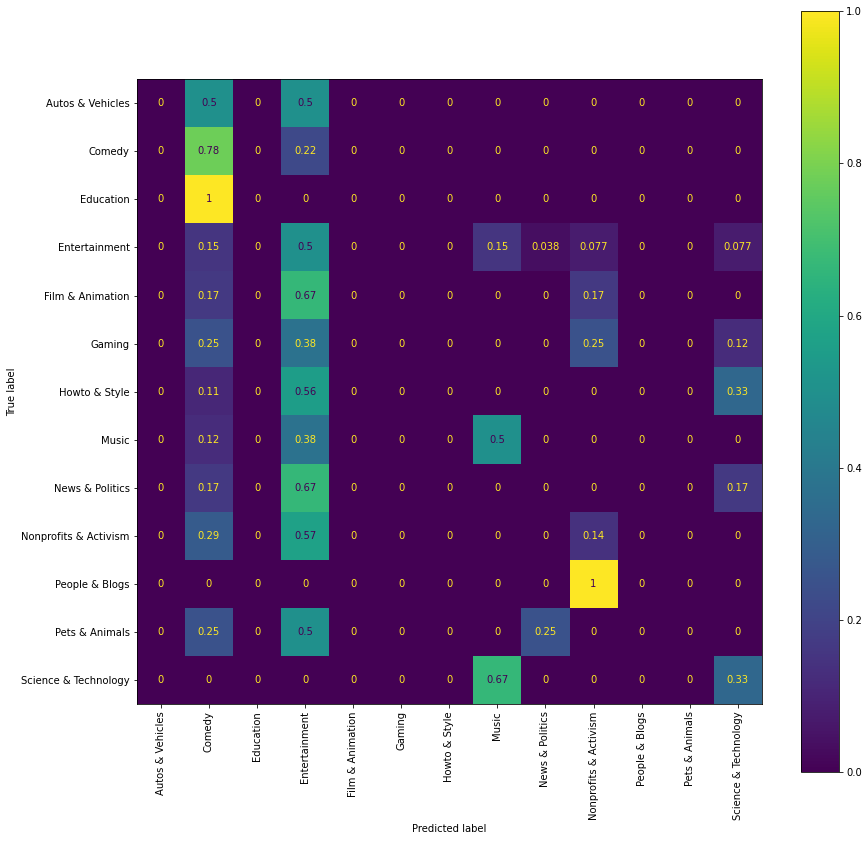

In [6]:
from sklearn.metrics import plot_confusion_matrix

def get_classifier():
    return KNeighborsClassifier(n_neighbors=13)

model = get_classifier()
model.fit(x_train, y_train)
plt.figure(figsize=(14, 14))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=90, normalize='true', ax=plt.axes())

In [7]:
k = 5
cv = np.random.randint(k, size=len(df))

scores = np.zeros(k)

for i in range(k):
    train_idx = cv != i
    test_idx = cv == i
    cv_x_train = x[train_idx]
    cv_x_test = x[test_idx]
    cv_y_train = y[train_idx]
    cv_y_test = y[test_idx]
    
    model = get_classifier()
    model.fit(cv_x_train, cv_y_train)
    score = model.score(cv_x_test, cv_y_test)
    scores[i] = score
    print(score)
print('mean', scores.mean())

0.31645569620253167
0.2692307692307692
0.3076923076923077
0.3333333333333333
0.25263157894736843
mean 0.2958687370812621
